# Inicio

## Bibliotecas

In [ ]:
# Bibliotecas para manejo de datos
import pandas as pd
import numpy as np

# Bibliotecas para obtener el dataset automaticamente de google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Bibliotecas para gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Otras bibliotecas
import os
import warnings
import re
from collections import Counter

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

## Descarga de archivos

In [ ]:
!wget -q https://github.com/lucialiceri/7506R-2C2022-GRUPO17/raw/main/df_precio_train.csv
!wget -q https://github.com/lucialiceri/7506R-2C2022-GRUPO17/raw/main/df_precio_test.csv
!wget -q https://github.com/lucialiceri/7506R-2C2022-GRUPO17/raw/main/df_tipo_precio_train.csv
!wget -q https://github.com/lucialiceri/7506R-2C2022-GRUPO17/raw/main/df_tipo_precio_test.csv

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"1UDFtb3NkrkEujWPohomSTH6G6DA-KqLT"})
downloaded.GetContentFile('df_propiedades_test.csv')

downloaded = drive.CreateFile({'id':"1ahXY5xBLgV9N7fCXq9kx8xo_DcnuMgai"})
downloaded.GetContentFile('df_propiedades_train.csv')


## Datasets

In [ ]:
df_propiedades_train = pd.read_csv('/content/df_propiedades_train.csv')
df_propiedades_test = pd.read_csv('/content/df_propiedades_test.csv')
df_precio_train = pd.read_csv('/content/df_precio_train.csv')
df_precio_test = pd.read_csv('/content/df_precio_test.csv')
df_tipo_precio_train = pd.read_csv('/content/df_tipo_precio_train.csv')
df_tipo_precio_test = pd.read_csv('/content/df_tipo_precio_test.csv')

#Procesamiento del Lenguaje Natural

## Ampliación del dataset

El ampliamento del dataset con el campo de descripción no lo hacemos en esta sección. Ésto es así porque el dataset de propiedades que obtenemos de la base, se encuentra filtrado gracias al otro tp. Por lo tanto van a existir registros que no estén, asi que para poder solucionar eso, procesamos el archivo con el primer tp. 
Se hizo un merge con el archivo de `properti_propiedades` con `properti_propiedades_descrip` en base al id. Luego se proceso el dataset como se muestra en el anterior trabajo practico.

Para empezar la limpieza de las descripciones, vamos a borrar de cada descripcion todas las palabras que no aporten valor (conjunciones, preposiciones, conectores, etc.) que contenga. Así quedarían las palabras más revelantes.

In [ ]:
df_propiedades = df_propiedades_train.copy()

In [ ]:
palabras_eliminar =[
    "a",
    "aquí",	"cerca",	"recién",
"ya",	"nunca",	"posiblemente",
"mal",	"muy",	"lejos",
"no",	"abajo"	,"ayer",
"aún", "casi", "siempre",	"hoy", "últimamente",	"más",	"encima",
"acá",	"arriba"	,"todavía"
"mejor",	"despacio",	"algo",
"mañana",	"tarde",	"fuera",
"delante",	"ahora",	"mucho",
"así",	"detrás",	"pronto",
"temprano",	"jamás",	"dentro",
"seguramente",	"quién",	"indudablemente",
"poco",	"probablemente",	"peor",
"tampoco",	"bastante",	"rápidamente",
"sí",	"similar",	"harto",
"fácilmente",	"demasiado",	"a", "lo",
"dónde",",","x","esta",	"cuándo",	"cómo",
"seguro",	"ciertamente",	"quizás",
"qué","es","1", "2", "4","3","5","6","7","8","9","0","cuenta","son",	"acaso"	,"efectivamente",
"tal vez"	,"ni", "siquiera",	"verdaderamente",
"que","un", "se","una", "del", "muy", "las","la","los","al","el","-",".","y", "pero", "o","u", "ante", "bajo", "cabe", "con", "contra", "de", "desde", "durante", "en", "entre", "hacia", "hasta", "mediante", "para", "por", "según", "sin", "so", "sobre", "tras", "versus", "vía"]
desc_split = []
for index, raw in df_propiedades.iterrows():
  raw['descripcion'] = str(raw['descripcion'])
  raw['descripcion'] = re.sub(r'<.*?>', '',raw['descripcion'])
  descripcion_split = raw['descripcion'].split()
  lista = [word for word in descripcion_split if word.lower()
                  not in palabras_eliminar]
  desc_split.append([word for word in descripcion_split if word.lower()
                  not in palabras_eliminar])
  raw['descripcion'] = ' '.join(lista)

Buscamos las palabras que más se repiten a lo largo de todas las descripciones

In [ ]:
''' parser = Counter(str(desc_split))
parser.most_common() '''
#str(desc_split)
string = ""
for i in range(0, len(desc_split)):
  string += ' '.join(map(str,desc_split[i]))

counter = Counter(string.split())
counter.most_common(100)

[('cocina', 39482),
 ('ambientes', 38914),
 ('valor', 38674),
 ('Av.', 36811),
 ('comedor', 36230),
 ('baño', 36169),
 ('piso', 33771),
 ('/', 32513),
 ('tu', 32480),
 ('balcón', 30325),
 ('casa', 29312),
 ('inmueble', 28943),
 ('propiedad.', 28202),
 ('30%', 28010),
 ('departamento', 27599),
 ('préstamo', 27246),
 ('cuadras', 27139),
 ('cuota', 27105),
 ('medidas', 26599),
 ('living', 26411),
 ('Responsable:', 26281),
 ('querés!', 25728),
 ('podés.', 25666),
 ('Simulá', 25660),
 ('Accedé', 25656),
 ('#', 25559),
 ('ID', 25535),
 ('MLS', 25531),
 ('CUCICBA', 25111),
 ('dos', 24704),
 ('edificio', 24331),
 ('personas', 24109),
 ('completo', 24044),
 ('salida', 23684),
 ('propiedad', 23585),
 ('parte', 22536),
 ('encuentra', 21994),
 ('pisos', 21987),
 ('frente', 21895),
 ('amplio', 21058),
 ('Comprá', 21019),
 ('\\n\\n', 20969),
 ('vista', 20257),
 ('dormitorio', 19772),
 ('presente', 19639),
 ('gran', 19563),
 ('Ley', 19138),
 ('espacio', 18820),
 ('placard', 18775),
 ('metros', 18582)

In [ ]:
def obtener_palabras_cercanas_regex(index, descr_split, palabra, descripcion):
        string_regex="\w[\w'-]*"
        regex_final = ""
        index = descr_split.index(palabra)
        if index > 1:
            regex_final = string_regex + " "+ string_regex + " "+ palabra
        elif index == 1:
            regex_final = string_regex  +" "+ palabra
        else:
            regex_final = palabra
        if  index + 2 < len(descr_split):
            regex_final = regex_final + " "+ string_regex + " " + string_regex
        elif index + 1 < len(descr_split):
            regex_final = regex_final + " " + string_regex
        return re.findall(regex_final, descripcion)


Vamos a buscar cuales son las frases que más se repiten en las descripciones con las palabras elegidas.

In [ ]:
palabras_usar = ['baño', 'cocina','comedor', 'living','piso', 'planta', 'patio', 'balcón', 'terraza']
diccionario = {}


for index, raw in df_propiedades.iterrows():
  for palabra in palabras_usar:
      descr_split = str(raw['descripcion']).split()
      if palabra in descr_split:
        index = descr_split.index(palabra)
        oracion_final = obtener_palabras_cercanas_regex(index, descr_split, palabra, raw['descripcion'])
        if len(oracion_final) != 0:
          if palabra in diccionario.keys():
            diccionario[palabra].append(oracion_final[0])
          else: 
              diccionario[palabra] = [oracion_final[0]]
  

In [ ]:
diccionario

{'piso': ['similar y piso antitérmico según',
  'placards de piso a techo',
  'un 11er piso con vista',
  'un 3er piso y se',
  'un tercer piso al frente',
  'Revestimiento de piso y paredes',
  'amplio con piso de parquet',
  'en tercer piso con terraza',
  'con entre piso en Parque',
  'hoja de piso a techo',
  'ventanales de piso a techo',
  'un noveno piso y cuenta',
  'en primer piso al frente',
  'departamentos por piso desde Planta',
  'un 1er piso y nos',
  'de un piso 5 en',
  'placares de piso a techo',
  'el 9 piso al frente',
  'ventanales del piso superior cuentan',
  'pero en piso elevado y',
  'unidades por piso y 2',
  'en primer piso de uso',
  'armarios de piso a techo',
  'departamentos por piso El departamento',
  'comedor con piso de madera',
  'amplio con piso de parquet',
  'en quinto piso con disposición',
  'un primer piso por escalera',
  'Cuenta con piso de cerámica',
  '31m2 con piso flotante y',
  'en el piso superior 1',
  'ventanales de piso a techo',
  '

Filtramos las oraciones, eliminandole las palabras sin valor y buscamos las palabras mas frecuentes.

In [ ]:
for palabra, lista_palabras in diccionario.items():
    string = ""
    string = " ".join(list(lista_palabras))
    lista = [palabra for palabra in string.split() if palabra.lower() not in palabras_eliminar]
    string = " ".join(lista)
    counter = Counter(string.split())
    diccionario[palabra] = counter.most_common(10)

In [ ]:
diccionario

{'piso': [('piso', 15601),
  ('primer', 2037),
  ('techo', 1792),
  ('frente', 1467),
  ('escalera', 1247),
  ('segundo', 771),
  ('contrafrente', 574),
  ('placard', 569),
  ('radiante', 524),
  ('parquet', 470)],
 'comedor': [('comedor', 13494),
  ('living', 8438),
  ('salida', 2380),
  ('amplio', 1954),
  ('cocina', 1757),
  ('diario', 1726),
  ('Amplio', 1477),
  ('Living', 1227),
  ('gran', 634),
  ('pisos', 603)],
 'living': [('living', 10313),
  ('comedor', 5960),
  ('amplio', 1651),
  ('gran', 463),
  ('dormitorio', 380),
  ('dormitorios', 346),
  ('luminoso', 323),
  ('integrada', 275),
  ('como', 257),
  ('salida', 205)],
 'balcón': [('balcón', 13644),
  ('salida', 3589),
  ('frente', 2292),
  ('corrido', 1952),
  ('terraza', 1121),
  ('ambientes', 993),
  ('aterrazado', 929),
  ('vista', 902),
  ('amplio', 871),
  ('contrafrente', 573)],
 'baño': [('baño', 10851),
  ('completo', 3739),
  ('suite', 1749),
  ('servicio', 1323),
  ('principal', 632),
  ('vestidor', 627),
  ('co

Elegimos las palabras mas comunes que atribuyan información valiosa.

*   Baño
    *   Principal
    *   Completo
    *   Servicio
*   Planta
    *   Baja
    *   Alta
    *   Sola
*   Terraza
    *   Parrilla
    *   Propia
    *   Amplia
*   Cocina
    *   Integrada
    *   Separada
    *   Equipada
*   Patio
    *   Amplio
    *   Pequeño
    *   Interno
*   Piso
    *   Contrafrente
    *   Parquet
*   Terraza
    *   Parrilla
    *   Propia
    *   Amplia
*   Living
    *   Amplio
    *   Luminoso
    *   Integrada
*   Balcón
    *   Contrafrente
    *   Corrido
    *   Amplio
*   Comedor
    *   Diario
    *   Amplio

Anteriormente habiamos observado que las palabras *medidas* y *frente* eran de las palabras mas utilizadas, pero al analizar las palabras que acompañan a dichas palabras, podemos observar que no aportan mucha información, asi que no se tomaran en cuenta.






In [ ]:
for palabra in palabras_usar:
  if palabra in df_propiedades.columns:
    df_propiedades.drop(palabra, inplace=True, axis=1)
  df_propiedades[palabra] = ""

df_propiedades.head()

,fecha_inicio,fecha_fin,latitud,longitud,barrio,tipo,ambientes,habitaciones,superficie_total,superficie_cubierta,descripcion,baño,cocina,comedor,living,piso,planta,patio,balcón,terraza
0,2021-02-27,2021-05-02,-34.603043,-58.415155,Almagro,Departamento,1.0,1.0,44.0,41.0,"1 AMB AL FRENTE , CONTADO AL VALOR DE LISTA, ...",,,,,,,,,
1,2021-08-10,2022-01-27,-34.618294,-58.455284,Caballito,PH,3.0,2.0,81.0,81.0,NUEVO. TRIPLEX TIPO CASA 3 AMBIENTES. FRENTE A...,,,,,,,,,
2,2021-06-26,2021-07-03,-34.637893,-58.447884,Parque Chacabuco,Departamento,2.0,1.0,42.0,38.0,Corredor Responsable: Marcelo Trujillo - CUCIC...,,,,,,,,,
3,2021-10-28,2022-02-03,-34.584587,-58.400513,Palermo,Departamento,3.0,2.0,80.0,70.0,Excelente semipiso de 3 ambientes con balcón c...,,,,,,,,,
4,2021-11-15,2021-12-30,-34.616578,-58.446691,Caballito,Departamento,5.0,4.0,190.0,178.0,UBICACIÓN: Aranguren al 0 - 1er Piso - Ciudad...,,,,,,,,,


In [ ]:
palabras_comunes = {
    "baño": [
        "completo",
        "servicio",
    ],
    "planta": [
        "baja",
        "alta",
        "sola"
    ],
    "terraza": [
        "parrilla",
        "propia",
        "amplia"
    ],
    "cocina": [
        "integrada",
        "separada",
        "equipada"
    ],
    "patio": [
        "amplio",
        "pequeño",
        "interno"
    ],
    "piso": [
        "contrafrente",
        "parquet",
    ],
    "living": [
        "amplio",
        "luminoso",
        "integrada"
    ],
    "balcón": [
        "contrafrente",
        "corrido",
        "amplio"
    ],
    "comedor": [
        "diario",
        "amplio",
    ],
}

Completamos la informacion del dataset buscando cual es la palabra que más se repite segun las palabras que elegimos.

In [ ]:
y = 1
for index, row in df_propiedades.iterrows():
  for palabra in palabras_usar:
    descr_split = row['descripcion'].split()
    if palabra in descr_split:
      index = descr_split.index(palabra)
      palabras_cercanas = obtener_palabras_cercanas_regex(index, descr_split, palabra, row['descripcion'])
      valor = ""
      if len(palabras_cercanas) != 0:
        palabras_split = palabras_cercanas[0].split()
        palabras_split = list(map(lambda x: x.lower(), palabras_split))
        for caracteristica in palabras_comunes[palabra]:
          if caracteristica in palabras_split:
              valor = caracteristica
              break
      df_propiedades.loc[index, [palabra]] = valor

In [ ]:
df_propiedades

,fecha_inicio,fecha_fin,latitud,longitud,barrio,tipo,ambientes,habitaciones,superficie_total,superficie_cubierta,descripcion,baño,cocina,comedor,living,piso,planta,patio,balcón,terraza
0,2021-02-27,2021-05-02,-34.603043,-58.415155,Almagro,Departamento,1.0,1.0,44.0,41.0,"1 AMB AL FRENTE , CONTADO AL VALOR DE LISTA, ...",,,,,,,,,
1,2021-08-10,2022-01-27,-34.618294,-58.455284,Caballito,PH,3.0,2.0,81.0,81.0,NUEVO. TRIPLEX TIPO CASA 3 AMBIENTES. FRENTE A...,,,,,,baja,,,
2,2021-06-26,2021-07-03,-34.637893,-58.447884,Parque Chacabuco,Departamento,2.0,1.0,42.0,38.0,Corredor Responsable: Marcelo Trujillo - CUCIC...,,,,,,,,,propia
3,2021-10-28,2022-02-03,-34.584587,-58.400513,Palermo,Departamento,3.0,2.0,80.0,70.0,Excelente semipiso de 3 ambientes con balcón c...,completo,,,,,baja,,contrafrente,
4,2021-11-15,2021-12-30,-34.616578,-58.446691,Caballito,Departamento,5.0,4.0,190.0,178.0,UBICACIÓN: Aranguren al 0 - 1er Piso - Ciudad...,,,,,,baja,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74439,2021-04-24,2021-06-05,-34.553114,-58.466636,Nuñez,Departamento,1.0,1.0,45.0,38.0,AMPLIO Y LUMINOSO MONOAMBIENTE DIVISIBLE CON...,,,,,,,,,
74440,2021-08-31,2021-09-23,-34.571048,-58.486887,Villa Urquiza,Departamento,2.0,1.0,42.0,39.0,VENTA en Villa Urquiza. Departamento de 2 Ambi...,,,,,,,,,
74441,2021-08-21,2021-08-25,-34.567066,-58.462300,Belgrano,Departamento,3.0,2.0,75.0,68.0,Departamento de 3 ambientes en Belgrano<br><br...,,,,,,,,,
74442,2021-09-24,2021-09-26,-34.558780,-58.458498,Belgrano,Departamento,3.0,2.0,57.0,49.0,Corredor Responsable: Marcelo Trujillo - CUCIC...,,,,,,,,,


## Modelos

### Usando los mismos hiperparámetros del TP1

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor()



### Optimizando hiperparámetros

### Resultados

# Redes Neuronales

### Preprocesamiento

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score,  recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

import tensorflow as tf
from tensorflow import keras
import keras.backend as K
!pip install scikeras[tensorflow]
import scikeras
from scikeras.wrappers import KerasRegressor, KerasClassifier
!pip install tensorflow_addons
from tensorflow_addons.metrics import RSquare

np.random.seed(12)
tf.random.set_seed(12)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
columnas_a_eliminar = ['fecha_inicio', 'fecha_fin', "descripcion"]
df_propiedades_train.drop(columns=columnas_a_eliminar, inplace=True)
df_propiedades_test.drop(columns=columnas_a_eliminar, inplace=True)

# Descarto las observaciones que no tienen latitud ni longitud
df_propiedades_train.dropna(inplace=True)
df_precio_train = df_precio_train.loc[df_propiedades_train.index].copy()
df_tipo_precio_train = df_tipo_precio_train.loc[df_propiedades_train.index].copy()
df_propiedades_test.dropna(inplace=True)
df_precio_test = df_precio_test.loc[df_propiedades_test.index].copy()
df_tipo_precio_test = df_tipo_precio_test.loc[df_propiedades_test.index].copy()

# Creo dummies para tipos y barrios
columnas_para_dummies = ["tipo", "barrio"]
df_propiedades_train = pd.get_dummies(df_propiedades_train, columns = columnas_para_dummies, drop_first=True)
df_propiedades_test = pd.get_dummies(df_propiedades_test, columns = columnas_para_dummies, drop_first=True)

# Encoding para las categorias
clases = ['bajo', 'medio', 'alto']
encoder = OneHotEncoder(categories = [clases])
df_tipo_precio_train = encoder.fit_transform(df_tipo_precio_train).toarray()
df_tipo_precio_test = encoder.transform(df_tipo_precio_test).toarray()

# Normalizo
x_scaler = StandardScaler()
x_train = x_scaler.fit_transform(df_propiedades_train.to_numpy())
x_test = x_scaler.transform(df_propiedades_test.to_numpy())

In [ ]:
columnas_predictoras = list(df_propiedades_train.columns)

# Constantes
d_in = len(columnas_predictoras)
d_out = 1
n_epocas = 128
n_batch = 256

## Regresión

In [ ]:
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(df_precio_train.to_numpy())
y_test = y_scaler.transform(df_precio_test.to_numpy())

loss_regresion = 'mse'
metricas_regresion = ['mse', 'mae', RSquare()]

### Funciones auxiliares

In [ ]:
def mostrar_metricas_regresion(modelo):
  '''Imprime las métricas de MSE, MAE y R2 tanto para train como para test'''
  y_pred = modelo.predict(x_test)
  y_pred_inverse = y_scaler.inverse_transform(y_pred)

  # Métricas
  aux_mse = y_scaler.inverse_transform(np.reshape(modelo.history_['mean_squared_error'], (-1, 1)))
  aux_mae = y_scaler.inverse_transform(np.reshape(modelo.history_['mean_absolute_error'], (-1, 1)))

  mse_train = round(modelo.history_['mean_squared_error'][n_epocas - 1], 3)
  mse_real_train = int(aux_mse[n_epocas - 1][0])
  mae_train = round(modelo.history_['mean_absolute_error'][n_epocas - 1], 3)
  mae_real_train = int(aux_mae[n_epocas - 1][0])
  r2_train = round(modelo.history_['r_square'][n_epocas - 1], 3)

  mse_test = round(mean_squared_error(y_test, y_pred, squared = True), 3)
  mse_real_test = int(mean_squared_error(y_test, y_pred_inverse, squared = True))
  mae_test = round(mean_squared_error(y_test, y_pred, squared = False), 3)
  mae_real_test = int(mean_squared_error(y_test, y_pred_inverse, squared = False))
  r2_test = round(r2_score(y_test, y_pred), 3)

  print(f'----------------------TRAIN----------------------')
  print(f'Error cuadrático medio en train: {mse_train}')
  print(f'Error cuadrático medio real en train: {mse_real_train}')
  print(f'Error absoluto medio en train: {mae_train}')
  print(f'Error absoluto medio real en train: {mae_real_train}')
  print(f'R2 score en train: {r2_train}')
  
  print(f'----------------------TEST----------------------')
  print(f'Error cuadrático medio en test: {mse_test}')
  print(f'Error cuadrático medio real en test: {mse_real_test}')
  print(f'Error absoluto medio en test: {mae_test}')
  print(f'Error absoluto medio real en test: {mae_real_test}')
  print(f'R2 score en test: {r2_test}')
  print(f'-------------------------------------------------')

In [ ]:
def mostrar_historial_regresion(modelo):
  '''Plotea un gráfico mostrando como varía el MSE y MAE a medida que aumentan las épocas'''
  plt.plot(modelo.history_['mean_absolute_error'], color='orange', label='MAE')
  plt.plot(modelo.history_['mean_squared_error'], color='blue', label='MSE')
  plt.title('Historial de error absoluto medio')
  plt.ylabel('Error absoluto medio')
  plt.xlabel('Epoca')
  plt.legend()
  plt.show()

### Modelo 1

El primer modelo a utilizar es el más sencillo posible: una red neuronal con una sóla capa de 1 neurona, la cuál recibe el valor de las variables predictoras (más un bias independiente) y tiene como salida la estimación calculada (ya que la función de activación es lineal, f(x) = x).

Como optimizador utilizaremos simplemente descenso por gradiente. Más adelante se utilizará otros métodos más eficientes. Además, se utiliza Error Cuadrático Medio como función de pérdida.

Por último, cabe destacar que todos los modelos son optimizados utilizando validación cruzada.

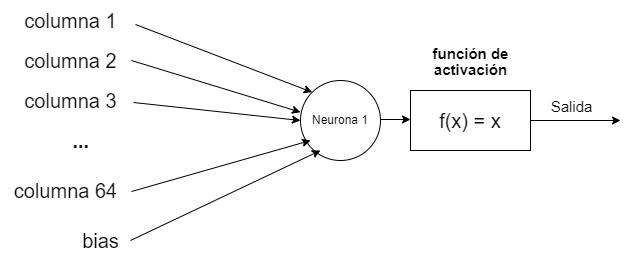

In [ ]:
def crear_modelo1_regresion():
  modelo1 = keras.Sequential([keras.layers.Dense(d_out, input_shape=(d_in,))])

  modelo1.compile(optimizer=keras.optimizers.SGD(learning_rate=0.00001), 
                  loss=loss_regresion, 
                  metrics=metricas_regresion)
  return modelo1

545/545 [==============================] - 1s 1ms/step
----------------------TRAIN----------------------
Error cuadrático medio en train: 1.119
Error cuadrático medio real en train: 545787
Error absoluto medio en train: 0.568
Error absoluto medio real en train: 386430
R2 score en train: -0.119
----------------------TEST----------------------
Error cuadrático medio en test: 0.946
Error cuadrático medio real en test: 50235819391
Error absoluto medio en test: 0.972
Error absoluto medio real en test: 224133
R2 score en test: 0.038
-------------------------------------------------


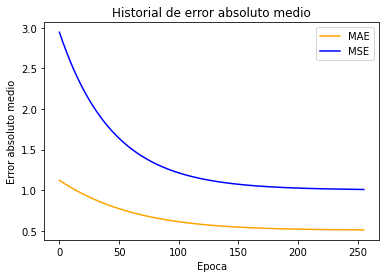

In [ ]:
modelo_cv1 = KerasRegressor(build_fn=crear_modelo1_regresion, random_state=12)

# Entrenamiento del modelo
modelo_cv1.fit(x_train, y_train, epochs = 256, batch_size = 128, verbose = False)

mostrar_metricas_regresion(modelo_cv1)
mostrar_historial_regresion(modelo_cv1)

Se puede observar que el error es bastante peor que los modelos vistos en la parte de regresión del TP1 (los cuales se encontraban en el rango de 150000-100000 de error absoluto medio). Esto tiene sentido, ya que es el modelo más sencillo, y equivale a una regresión lineal con múltiples inputs.

### Modelo 2

Esta vez, agregaremos una segunda capa de una neurona. En total tendremos una neurona que recibe todas los features y su bias, y cuyo resultado se envía a la segunda neurona, la cuál también tiene un bias propio. La salida de esta neurona será el resultado obtenido.

In [ ]:
def crear_modelo2_regresion():
  modelo2 = keras.Sequential([keras.layers.Dense(1, input_shape=(d_in,), activation="linear"),
                            keras.layers.Dense(d_out, activation="linear")])

  modelo2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.00001), 
                  loss=loss_regresion, 
                  metrics=metricas_regresion)
  return modelo2

545/545 [==============================] - 1s 1ms/step
----------------------TRAIN----------------------
Error cuadrático medio en train: 1.006
Error cuadrático medio real en train: 513158
Error absoluto medio en train: 0.509
Error absoluto medio real en train: 369295
R2 score en train: -0.006
----------------------TEST----------------------
Error cuadrático medio en test: 0.983
Error cuadrático medio real en test: 49949426212
Error absoluto medio en test: 0.992
Error absoluto medio real en test: 223493
R2 score en test: -0.001
-------------------------------------------------


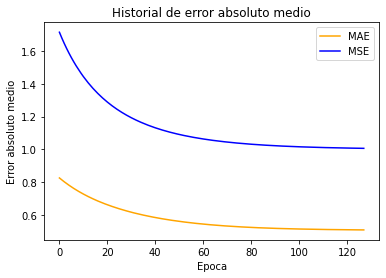

In [ ]:
modelo_cv2 = KerasRegressor(build_fn=crear_modelo2_regresion, random_state=12)

# Entrenamiento del modelo
modelo_cv2.fit(x_train, y_train, epochs = 128, batch_size = 128, verbose = False)

mostrar_metricas_regresion(modelo_cv2)
mostrar_historial_regresion(modelo_cv2)

El resultado es una mejora leve en el MSE del test, pero un peor R2 score y métricas en train.

### Modelo 3

Para este modelo, ya agregamos varias capas ocultas, todas en forma de pirámide (la siguiente capa siempre tiene la mitad de neuronas que la primera). Esto resulta en una red neuronal mucho más compleja que las de los primeros dos modelos.

In [ ]:
def crear_modelo3_regresion():
  modelo3 = keras.Sequential([keras.layers.Dense(512, input_shape=(d_in,), activation="linear"),
                            keras.layers.Dense(256, activation="linear"),
                            keras.layers.Dense(128, activation="linear"),
                            keras.layers.Dense(64, activation="linear"),
                            keras.layers.Dense(32, activation="linear"),
                            keras.layers.Dense(16, activation="linear"),
                            keras.layers.Dense(8, activation="linear"),
                            keras.layers.Dense(4, activation="linear"),
                            keras.layers.Dense(2, activation="linear"),
                            keras.layers.Dense(d_out, activation="linear")])

  modelo3.compile(optimizer=keras.optimizers.SGD(learning_rate=0.00001), 
                  loss=loss_regresion, 
                  metrics=metricas_regresion)
  return modelo3

545/545 [==============================] - 1s 2ms/step
----------------------TRAIN----------------------
Error cuadrático medio en train: 0.999
Error cuadrático medio real en train: 511084
Error absoluto medio en train: 0.505
Error absoluto medio real en train: 368229
R2 score en train: 0.001
----------------------TEST----------------------
Error cuadrático medio en test: 0.94
Error cuadrático medio real en test: 49328896975
Error absoluto medio en test: 0.97
Error absoluto medio real en test: 222101
R2 score en test: 0.043
-------------------------------------------------


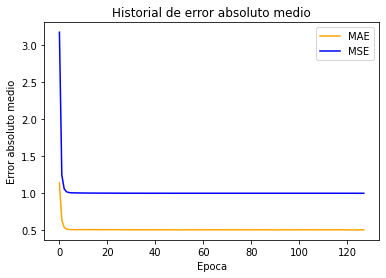

In [ ]:
modelo_cv3 = KerasRegressor(build_fn=crear_modelo3_regresion, random_state=12)

# Entrenamiento del modelo
modelo_cv3.fit(x_train, y_train, epochs = 128, batch_size = 128, verbose = False)

mostrar_metricas_regresion(modelo_cv3)
mostrar_historial_regresion(modelo_cv3)

En términos de métrica, empeora ligeramente el MSE del test con respecto al modelo 2, pero mejora mucho su R2 score. Además, cabe destacar que las métricas se estabilizan mucho mas rápido.

### Modelo 3.5

Sin cambiar la red neuronal, podemos hacer un cambio achicando el valor de cada batch:

545/545 [==============================] - 1s 2ms/step
----------------------TRAIN----------------------
Error cuadrático medio en train: 1.0
Error cuadrático medio real en train: 511392
Error absoluto medio en train: 0.505
Error absoluto medio real en train: 368254
R2 score en train: -0.0
----------------------TEST----------------------
Error cuadrático medio en test: 0.937
Error cuadrático medio real en test: 49070890944
Error absoluto medio en test: 0.968
Error absoluto medio real en test: 221519
R2 score en test: 0.047
-------------------------------------------------


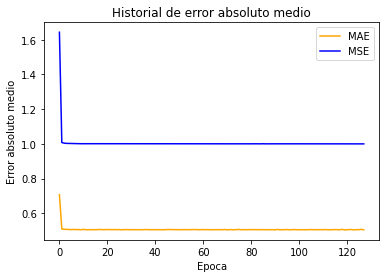

In [ ]:
modelo_cv35 = KerasRegressor(build_fn=crear_modelo3_regresion)

# Entrenamiento del modelo
modelo_cv35.fit(x_train, y_train, epochs = 128, batch_size = 32, verbose = False)

mostrar_metricas_regresion(modelo_cv35)
mostrar_historial_regresion(modelo_cv35)

Vemos que mejora muy poco el MSE y empeora el R2 ligeramente, por lo que achicar el batch size no necesariamente produce mejores resultados.

### Modelo 4

El cambio que se va a realizar ahora es el de cambiar el método de optimización. En este caso vamos a usar Nadam como nuevo optimizador.

In [ ]:
def crear_modelo4_regresion():
  modelo4 = keras.Sequential([keras.layers.Dense(512, input_shape=(d_in,), activation="linear"),
                            keras.layers.Dense(256, activation="linear"),
                            keras.layers.Dense(128, activation="linear"),
                            keras.layers.Dense(64, activation="linear"),
                            keras.layers.Dense(32, activation="linear"),
                            keras.layers.Dense(16, activation="linear"),
                            keras.layers.Dense(8, activation="linear"),
                            keras.layers.Dense(4, activation="linear"),
                            keras.layers.Dense(2, activation="linear"),
                            keras.layers.Dense(d_out, activation="linear")])

  modelo4.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07), 
                  loss=loss_regresion, 
                  metrics=metricas_regresion)
  return modelo4

545/545 [==============================] - 1s 2ms/step
----------------------TRAIN----------------------
Error cuadrático medio en train: 0.999
Error cuadrático medio real en train: 510959
Error absoluto medio en train: 0.505
Error absoluto medio real en train: 368082
R2 score en train: 0.001
----------------------TEST----------------------
Error cuadrático medio en test: 0.944
Error cuadrático medio real en test: 47734722099
Error absoluto medio en test: 0.972
Error absoluto medio real en test: 218482
R2 score en test: 0.039
-------------------------------------------------


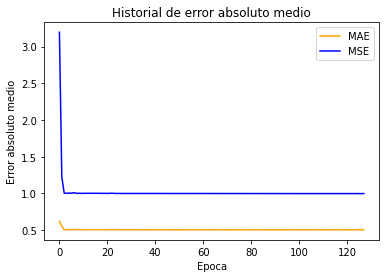

In [ ]:
modelo_cv4 = KerasRegressor(build_fn=crear_modelo4_regresion)

# Entrenamiento del modelo
modelo_cv4.fit(x_train, y_train, epochs = 128, batch_size = 128, verbose = False)

mostrar_metricas_regresion(modelo_cv4)
mostrar_historial_regresion(modelo_cv4)

El resultado sigue siendo similar, aunque se puede observar que las métricas varían mas con este nuevo método.

titanpush1024
### Modelo 5

In [ ]:
def crear_modelo5_regresion():
  modelo5 = keras.Sequential([keras.layers.Dense(512, input_shape=(d_in,), activation="linear"),
                              keras.layers.Dense(512, activation="linear"),
                              keras.layers.Dense(512, activation="linear"),
                              keras.layers.Dense(512, activation="linear"),
                              keras.layers.Dense(d_out, activation="linear")])

  modelo5.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.00001, beta_1=0.9, beta_2=0.9, epsilon=1e-07), 
                  loss=loss_regresion, 
                  metrics=metricas_regresion)
  return modelo5

545/545 [==============================] - 2s 4ms/step
----------------------TRAIN----------------------
Error cuadrático medio en train: 1.001
Error cuadrático medio real en train: 511647
Error absoluto medio en train: 0.505
Error absoluto medio real en train: 368272
R2 score en train: -0.001
----------------------TEST----------------------
Error cuadrático medio en test: 0.936
Error cuadrático medio real en test: 49073991127
Error absoluto medio en test: 0.967
Error absoluto medio real en test: 221526
R2 score en test: 0.048
-------------------------------------------------


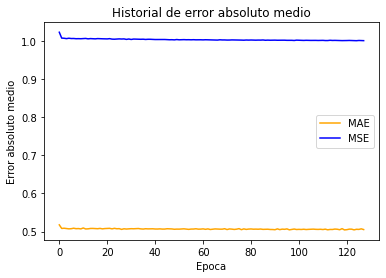

In [ ]:
modelo_cv5 = KerasRegressor(build_fn=crear_modelo5_regresion)

# Entrenamiento del modelo
modelo_cv5.fit(x_train, y_train, epochs = 128, batch_size = 128, verbose = False)

mostrar_metricas_regresion(modelo_cv5)
mostrar_historial_regresion(modelo_cv5)

## Clasificación

In [ ]:
y_train = df_tipo_precio_train.copy()
y_test = df_tipo_precio_test.copy()
y_test_compacto = np.argmax(y_test, axis=1).tolist()

d_out = 3   #Cantidad de clases

NameError: ignored

### Funciones auxiliares

In [ ]:
def mostrar_metricas_clasificacion(modelo):
  y_pred = modelo.predict(x_test)
  y_pred_compacto = np.argmax(y_pred, axis=1).tolist()

  # Métricas
  recall_train = round(modelo.history_['recall'][n_epocas - 1], 3)
  recall_test = round(recall_score(y_test_compacto, y_pred_compacto, average='micro'), 3)
  precision_train = round(modelo.history_['precision'][n_epocas - 1], 3)
  precision_test = round(precision_score(y_test_compacto, y_pred_compacto, average='micro'), 3)
  f1_train = round(modelo.history_['f1'][n_epocas - 1], 3)
  f1_test = round(f1_score(y_test_compacto, y_pred_compacto, average='micro'), 3)

  print(f'----------------------TRAIN----------------------')
  print(f'Recall en train: {recall_train}')
  print(f'Precisión en train: {precision_train}')
  print(f'F1 score en train: {f1_train}')
  print(f'----------------------TEST-----------------------')
  print(f'Recall en test: {recall_test}')
  print(f'Precisión en test: {precision_test}')
  print(f'F1 score en test: {f1_test}')
  print(f'-------------------------------------------------')

  # Matriz de confusión
  matriz_de_confusion = confusion_matrix(y_test_compacto, y_pred_compacto)
  sns.heatmap(matriz_de_confusion, cmap='GnBu',annot=True,fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

In [ ]:
def mostrar_historial_clasificacion(modelo):
  plt.plot(modelo.history_['precision'], color='orange', label='Precisión')
  plt.plot(modelo.history_['recall'], color='blue', label='Recall')
  plt.plot(modelo.history_['f1'], color='green', label='F1 Score')
  plt.title('Historial de métricas')
  plt.ylabel('Métrica')
  plt.xlabel('Epoca')
  plt.legend()
  plt.show()

In [ ]:
def f1(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1_val

In [ ]:
loss_clasificacion = 'categorical_crossentropy'
metricas_clasificacion = ['Precision', 'Recall', f1]

### Modelo 1

Crear un modelo de clasificación es muy similar a crear uno de regresión. La mayor diferencia está en que la salida de la red tendrá el mismo tamaño que la cantidad de clases que haya, en este caso tres. Para este problema utilizaremos la función de activación softmax en la última capa. Esta función convierte los resultados obtenidos en probabilidades, por lo que en cada salida de esta función se obtendrá la probabilidad de que la observación sea de esa clase. Además, la suma de las probabilidades es 1. 

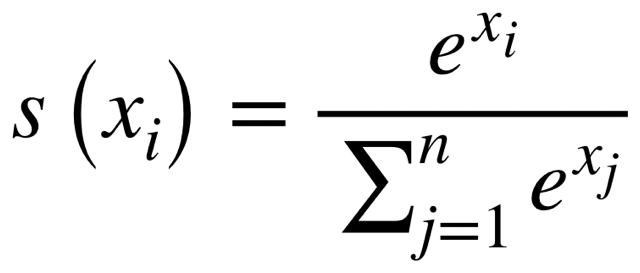

*Función de softmax, donde $x_i$ es el valor de entrada para la salida i (que representa el resultado de la red neuronal para una clase).*

Para este primer modelo crearemos una red trivial, con una sola capa de neuronas.

In [ ]:
def crear_modelo1_clasificacion():
  modelo1 = keras.Sequential([keras.layers.Dense(d_out, input_shape=(d_in,), activation='softmax')])

  modelo1.compile(optimizer=keras.optimizers.SGD(learning_rate=0.000000001), 
                  loss=loss_clasificacion, 
                  metrics=metricas_clasificacion)
  return modelo1

In [ ]:
modelo_cv1 = KerasClassifier(build_fn=crear_modelo1_clasificacion)

# Entrenamiento del modelo
modelo_cv1.fit(x_train, y_train, epochs = n_epocas, batch_size = n_batch, verbose = False)

mostrar_metricas_clasificacion(modelo_cv1)
mostrar_historial_clasificacion(modelo_cv1)

### Modelo 2

In [ ]:
def crear_modelo2_clasificacion():
  modelo2 = keras.Sequential([keras.layers.Dense(512, input_shape=(d_in,), activation='linear'),
                              keras.layers.Dense(256, activation='linear'),
                              keras.layers.Dense(128, activation='linear'),
                              keras.layers.Dense(64, activation='linear'),
                              keras.layers.Dense(32, activation='linear'),
                              keras.layers.Dense(16, activation='linear'),
                              keras.layers.Dense(d_out, activation='softmax')])

  modelo2.compile(optimizer=keras.optimizers.SGD(learning_rate=0.00001), 
                  loss=loss_clasificacion, 
                  metrics=metricas_clasificacion)
  
  return modelo2

In [ ]:
modelo_cv2 = KerasClassifier(build_fn=crear_modelo2_clasificacion)

# Entrenamiento del modelo
modelo_cv2.fit(x_train, y_train, epochs = n_epocas, batch_size = n_batch, verbose = False)

mostrar_metricas_clasificacion(modelo_cv2)
mostrar_historial_clasificacion(modelo_cv2)

Como se puede apreciar, las métricas se estabilizan al 

### Modelo 3

In [ ]:
def crear_modelo3_clasificacion():
  modelo3 = keras.Sequential([keras.layers.Dense(500, input_shape=(d_in,), activation='linear'),
                              keras.layers.Dense(400, activation='linear'),
                              keras.layers.Dense(300, activation='linear'),
                              keras.layers.Dense(200, activation='linear'),
                              keras.layers.Dense(100, activation='linear'),
                              keras.layers.Dense(50, activation='linear'),
                              keras.layers.Dense(d_out, activation='softmax')])

  modelo3.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.00001, beta_1=0.9, beta_2=0.9, epsilon=1e-07), 
                  loss=loss_clasificacion, 
                  metrics=metricas_clasificacion)
  
  return modelo3

In [ ]:
modelo_cv3 = KerasClassifier(build_fn=crear_modelo3_clasificacion)

# Entrenamiento del modelo
modelo_cv3.fit(x_train, y_train, epochs = n_epocas, batch_size = n_batch, verbose = False)

mostrar_metricas_clasificacion(modelo_cv3)
mostrar_historial_clasificacion(modelo_cv3)

### Modelo 4

In [ ]:
def crear_modelo4_clasificacion():
  modelo4 = keras.Sequential([keras.layers.Dense(500, input_shape=(d_in,), kernel_initializer='uniform', activation='linear'),
                              keras.layers.Dense(400, kernel_initializer='uniform', activation='linear'),
                              keras.layers.Dense(300, kernel_initializer='uniform', activation='linear'),
                              keras.layers.Dense(200, kernel_initializer='uniform', activation='linear'),
                              keras.layers.Dense(100, kernel_initializer='uniform', activation='linear'),
                              keras.layers.Dense(80, kernel_initializer='uniform', activation='linear'),
                              keras.layers.Dense(60, kernel_initializer='uniform', activation='linear'),
                              keras.layers.Dense(40, kernel_initializer='uniform', activation='linear'),
                              keras.layers.Dense(20, kernel_initializer='uniform', activation='linear'),
                              keras.layers.Dense(d_out, kernel_initializer='uniform', activation='softmax')])

  modelo4.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.00001, beta_1=0.9, beta_2=0.9, epsilon=1e-07), 
                  loss=loss_clasificacion, 
                  metrics=metricas_clasificacion)
  
  return modelo4

In [ ]:
modelo_cv4 = KerasClassifier(build_fn=crear_modelo4_clasificacion)

# Entrenamiento del modelo
modelo_cv4.fit(x_train, y_train, epochs = n_epocas, batch_size = n_batch, verbose = False)

mostrar_metricas_clasificacion(modelo_cv4)
mostrar_historial_clasificacion(modelo_cv4)

### Modelo 5

In [ ]:
def crear_modelo5_clasificacion():
  modelo5 = keras.Sequential([keras.layers.Dense(1000, input_shape=(d_in,), kernel_initializer='uniform', activation='linear'),
                              keras.layers.Dense(800, kernel_initializer='uniform', activation='linear'),
                              keras.layers.Dense(700, kernel_initializer='uniform', activation='linear'),
                              keras.layers.Dense(600, kernel_initializer='uniform', activation='linear'),
                              keras.layers.Dense(500, kernel_initializer='uniform', activation='linear'),
                              keras.layers.Dense(400, kernel_initializer='uniform', activation='linear'),
                              keras.layers.Dense(300, kernel_initializer='uniform', activation='linear'),
                              keras.layers.Dense(200, kernel_initializer='uniform', activation='linear'),
                              keras.layers.Dense(100, kernel_initializer='uniform', activation='linear'),
                              keras.layers.Dense(80, kernel_initializer='uniform', activation='linear'),
                              keras.layers.Dense(60, kernel_initializer='uniform', activation='linear'),
                              keras.layers.Dense(40, kernel_initializer='uniform', activation='linear'),
                              keras.layers.Dense(20, kernel_initializer='uniform', activation='linear'),
                              keras.layers.Dense(d_out, kernel_initializer='uniform', activation='softmax')])

  modelo5.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.00001, beta_1=0.9, beta_2=0.9, epsilon=1e-07), 
                  loss=loss_clasificacion, 
                  metrics=metricas_clasificacion)
  
  return modelo5

In [ ]:
modelo_cv5 = KerasClassifier(build_fn=crear_modelo5_clasificacion)

# Entrenamiento del modelo
modelo_cv5.fit(x_train, y_train, epochs = n_epocas, batch_size = n_batch, verbose = False)

mostrar_metricas_clasificacion(modelo_cv5)
mostrar_historial_clasificacion(modelo_cv5)

#Ensamble de modelos

## Ensamble con Voting

In [ ]:
!pip install -q -U scikit-plot
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
import scikitplot as skplt

In [ ]:
# Modelos
models = [('lr', LogisticRegression(random_state=12)),
          ('rnd', RandomForestClassifier(random_state=12)),
          ('knn', KNeighborsClassifier())]

# Ensemble de Votación
voting_model = VotingClassifier(estimators=models, voting='soft')

In [ ]:
# Formateo el y de tipo_precio a array 1-dimensional
y_train = np.argmax(df_tipo_precio_train, axis=1)
y_test = np.argmax(df_tipo_precio_test, axis=1)

In [ ]:
# Entrenamiento del ensemble
voting_model.fit(x_train, y_train)

In [ ]:
# Predicción del ensemble
y_pred = voting_model.predict(x_test)
y_pred_proba = voting_model.predict_proba(x_test)

### Métricas

#### Reporte de clasificación

In [ ]:
print(classification_report(y_test, y_pred))

#### Gráfico de AUC-ROC

In [ ]:
skplt.metrics.plot_roc(y_test, y_pred_proba, classes_to_plot=1, plot_micro=False, plot_macro=False, figsize=(8,8))
plt.show()

## Ensamble con Stacking

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_validate, StratifiedKFold

In [ ]:
#Modelos Base
base_models = [('linear', LinearRegression()),
              ('tree', tree.DecisionTreeRegressor(max_depth = 20, ccp_alpha = 0.05, random_state = 12)),
              ('knn', KNeighborsRegressor(n_neighbors=5, weights='distance'))]

#Meta Modelo
meta_model = tree.DecisionTreeRegressor(max_depth = 6, ccp_alpha = 0.05, random_state = 12)

#Ensemble Stacking
stacking_model = StackingRegressor(estimators=base_models, 
                                  final_estimator=meta_model,
                                  cv=5,
                                  verbose=2,
                                  n_jobs=3)

In [ ]:
cv = StratifiedKFold(n_splits=5)
results = cross_validate(stacking_model,
                         x_train,
                         df_precio_train,
                         scoring=['r2', 'neg_mean_absolute_error'],
                         cv=cv,
                         verbose=1,
                         n_jobs=4,
                         error_score='raise')

In [ ]:
_ = stacking_model.fit(x_train, df_precio_train)

In [ ]:
y_pred = stacking_model.predict(x_test)

In [ ]:
df_precio_pred = pd.Series(y_pred, name='precio_pred')
df_precios = df_precio_test.reset_index(drop=True).join(df_precio_pred)
df_precios.loc[:, 'porcentaje_diferencia'] = abs((df_precios['precio'] - df_precios['precio_pred']) / df_precios['precio'])

### Métricas

La métrica de  R2  se basa en calcular que tan bien el modelo se ajusta a los datos. Es un valor entre 0 y 1. Un valor alto en train y bajo en test puede indicar un posible overfitting. En este caso, los valores son similares, y considerablemente altos, lo que indica que es un buen modelo.

In [ ]:
r2_train = round(sum(results['test_r2']) / len(results['test_r2']), 3)    # Promedio de los distintos resultados de cross-validation
r2_test = round(r2_score(df_precios['precio'], df_precios['precio_pred']), 3)
print(f'R2 de cross-validation en train: {r2_train}')
print(f'R2 de test: {r2_test}')

A su vez, podemos calcular el promedio de error absoluto del modelo sobre el dataset de test. A simple vista, puede considerarse alto.

In [ ]:
error_cuadratiso_medio_train = int(sum(results['test_neg_mean_absolute_error']) / len(results['test_neg_mean_absolute_error']))
error_cuadratico_medio_test = int(mean_squared_error(df_precios['precio'], df_precios['precio_pred'], squared=False))
print(f'Error cuadrático medio en train: {error_cuadratiso_medio_train}')
print(f'Error cuadrático medio en test: {error_cuadratico_medio_test}')

Este gráfico indica la frecuencia de diferencia entre el precio real y el precio predecido por nuestro modelo. Vemos que en la gran mayoría de los casos, la diferencia es del menos del 50%, con el pico cerca del 10%.

In [ ]:
plt.figure(figsize=(6, 4))
grf = sns.kdeplot(data=df_precios['porcentaje_diferencia']).set(title="Densidad diferencia entre precio esperado y actual",xlabel="Diferencia",ylabel="Densidad", xlim=(0, 2))

# Conclusión